In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)

In [2]:
df = pd.read_csv("data_classification_for_task.csv")
df.columns = [x.lower() for x in df.columns]

### Часть 1 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1   gender      303 non-null    int64  
 2   feature_1   303 non-null    int64  
 3   feature_2   303 non-null    int64  
 4   feature_3   303 non-null    int64  
 5   feature_4   303 non-null    int64  
 6   feature_5   303 non-null    int64  
 7   feature_6   303 non-null    int64  
 8   feature_7   303 non-null    int64  
 9   feature_8   303 non-null    float64
 10  feature_9   303 non-null    int64  
 11  feature_10  303 non-null    int64  
 12  feature_11  303 non-null    int64  
 13  target      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,gender,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


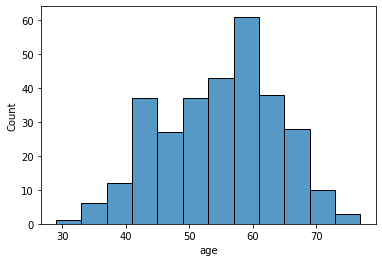

In [5]:
sns.histplot(df, x="age");

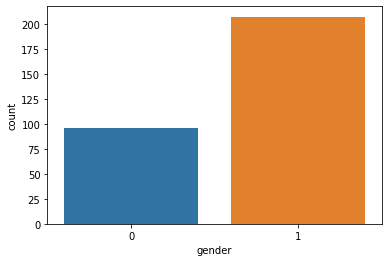

In [6]:
sns.countplot(x="gender", data=df);

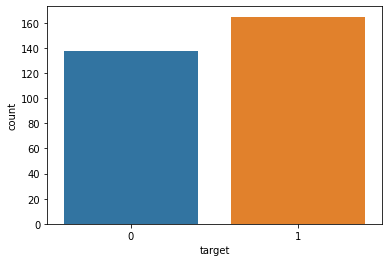

In [7]:
sns.countplot(x="target", data=df);

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,gender,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
feature_1,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
feature_2,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
feature_3,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
feature_4,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
feature_5,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
feature_6,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
feature_7,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
feature_8,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


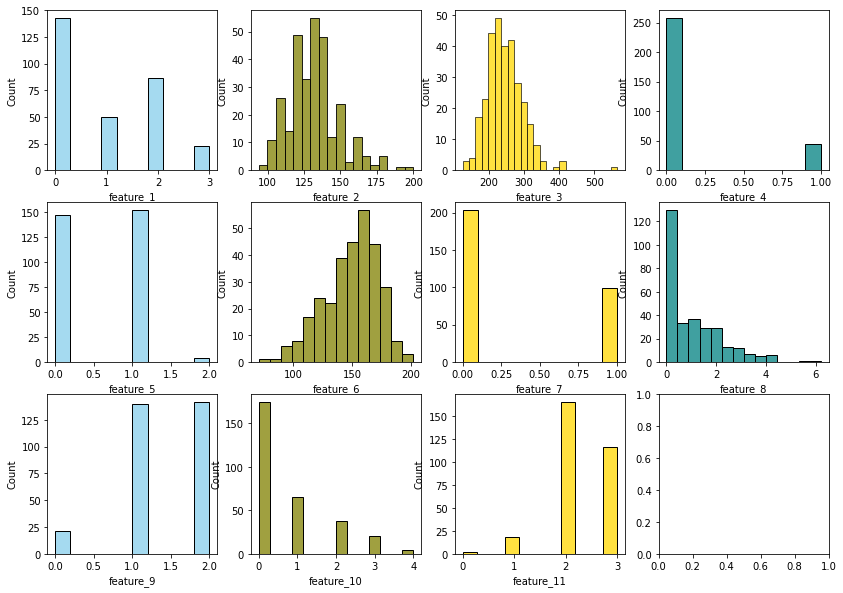

In [9]:
fig, axs = plt.subplots(3, 4, figsize=(14, 10))

sns.histplot(data=df, x="feature_1", color="skyblue", ax=axs[0, 0]);
sns.histplot(data=df, x="feature_2", color="olive", ax=axs[0, 1]);
sns.histplot(data=df, x="feature_3", color="gold", ax=axs[0, 2]);
sns.histplot(data=df, x="feature_4", color="teal", ax=axs[0, 3]);
sns.histplot(data=df, x="feature_5", color="skyblue", ax=axs[1, 0]);
sns.histplot(data=df, x="feature_6", color="olive", ax=axs[1, 1]);
sns.histplot(data=df, x="feature_7", color="gold", ax=axs[1, 2]);
sns.histplot(data=df, x="feature_8", color="teal", ax=axs[1, 3]);
sns.histplot(data=df, x="feature_9", color="skyblue", ax=axs[2, 0]);
sns.histplot(data=df, x="feature_10", color="olive", ax=axs[2, 1]);
sns.histplot(data=df, x="feature_11", color="gold", ax=axs[2, 2]);

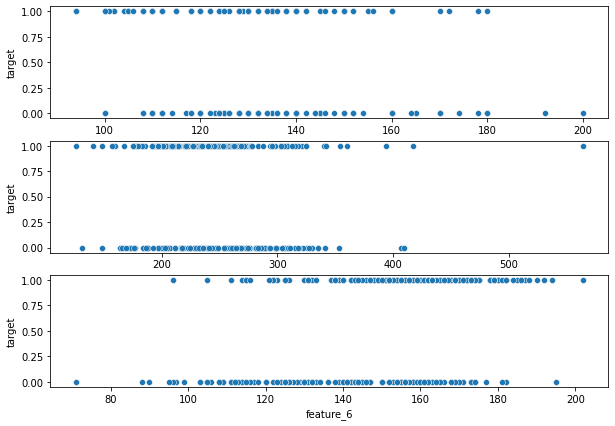

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7))
sns.scatterplot(data=df, x="feature_2", y="target", ax=axs[0]);
sns.scatterplot(data=df, x="feature_3", y="target", ax=axs[1]);
sns.scatterplot(data=df, x="feature_6", y="target", ax=axs[2]);

In [11]:
def mean_target_in_features(data: pd.DataFrame, feature: str) -> pd.DataFrame:
    """Среднее значение тагргета в группировках по значению признака"""
    df = data.groupby(feature, as_index=False)["target"].agg({"cnt_target": "count", "sum_count": "sum"})
    df["mean_target_in_group"] = round(df["sum_count"] / df["cnt_target"], 2)
    df.insert(0, "feature_name", feature)
    df.rename(columns={feature: "feature_value"}, inplace=True)
    return df

In [12]:
mean_target = pd.concat([mean_target_in_features(df, "feature_1"),
          mean_target_in_features(df, "feature_4"),
          mean_target_in_features(df, "feature_5"),
          mean_target_in_features(df, "feature_7"),
          mean_target_in_features(df, "feature_9"),
          mean_target_in_features(df, "feature_10"),
          mean_target_in_features(df, "feature_11")], axis=0, ignore_index=True)

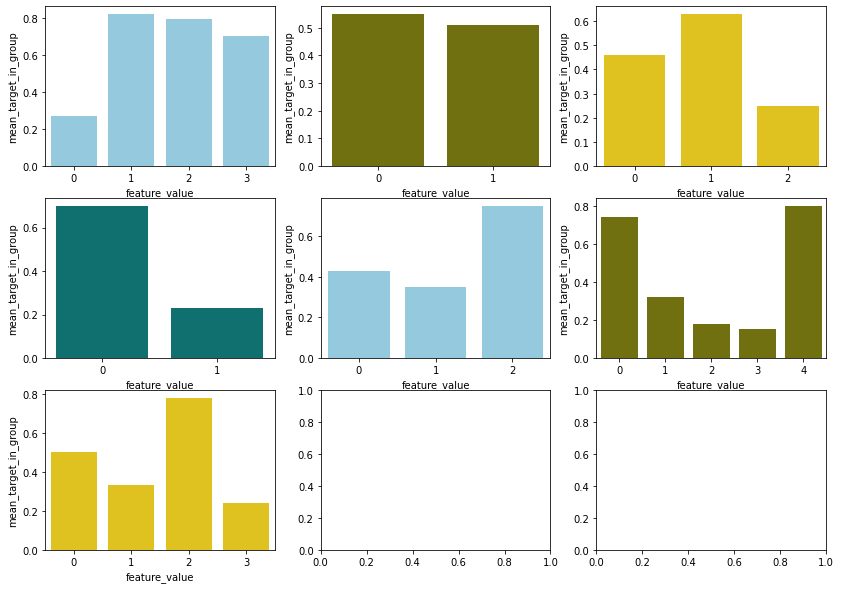

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_1"], 
             x="feature_value", y="mean_target_in_group", color="skyblue", ax=axs[0, 0]);
sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_4"], 
             x="feature_value", y="mean_target_in_group", color="olive", ax=axs[0, 1]);
sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_5"], 
             x="feature_value", y="mean_target_in_group", color="gold", ax=axs[0, 2]);
sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_7"], 
             x="feature_value", y="mean_target_in_group", color="teal", ax=axs[1, 0]);
sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_9"], 
             x="feature_value", y="mean_target_in_group", color="skyblue", ax=axs[1, 1]);
sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_10"], 
             x="feature_value", y="mean_target_in_group", color="olive", ax=axs[1, 2]);
sns.barplot(data=mean_target.loc[mean_target["feature_name"] == "feature_11"], 
             x="feature_value", y="mean_target_in_group", color="gold", ax=axs[2, 0]);

### Часть 2 Препроцессинг

In [14]:
X = df.drop(columns="target")
y = df["target"]

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
col_transfrom = ColumnTransformer(
[
    ('one', OneHotEncoder(drop='first'), ["gender", "feature_1", "feature_4", "feature_5", "feature_7", 
                                          "feature_9", "feature_10", "feature_11"]),
    ('scale', StandardScaler(), ["age", "feature_2", "feature_3", "feature_6", "feature_8"])
])

In [17]:
new_X = pd.DataFrame(col_transfrom.fit_transform(X), columns=col_transfrom.get_feature_names_out())

In [18]:
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV, train_test_split

In [19]:
tsne = TSNE(n_components=3, init='pca', random_state=RANDOM_STATE)
X_transform = tsne.fit_transform(new_X)

### Часть 3 Обучение моделей (стекинг)

    Шаг1. Обучение трёх моделей (логрег, ближайщие соседи, случайный лес)
    Шаг2. На предсказаниях моделей с шага 1, строится метамодель (логрег) и делает финальные предсказания

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.15,
                                                   random_state=RANDOM_STATE)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score

In [22]:
logistic = LogisticRegression()
parameters_log = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], "penalty": ["l1", "l2", "elasticnet"],
                 "random_state": [RANDOM_STATE]}
grid_log = GridSearchCV(estimator=logistic, param_grid=parameters_log, scoring="f1")
grid_log.fit(x_train, y_train)
print(grid_log.best_params_, grid_log.best_score_)
best_log = grid_log.best_estimator_
y_pred = best_log.predict(x_test)

{'C': 0.001, 'penalty': 'l2', 'random_state': 42} 0.6722776361854539


In [23]:
ner_nei = KNeighborsClassifier()
parameters_nn ={'n_neighbors': [3, 4, 5, 6], 'weights': ["uniform", "distance"]}
grid_nn = GridSearchCV(estimator=ner_nei, param_grid=parameters_nn, scoring="f1")
grid_nn.fit(x_train, y_train)
print(grid_nn.best_params_, grid_nn.best_score_)
best_nn = grid_nn.best_estimator_
y_pred = best_nn.predict(x_test)

{'n_neighbors': 4, 'weights': 'distance'} 0.7145021645021645


In [24]:
rf = RandomForestClassifier()
parameters_rf = {'n_estimators': [10, 50, 100], 'max_depth': [2, 3, 4], 
                 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2], 
                 'class_weight': ['balanced', 'balanced_subsample'], 'random_state': [RANDOM_STATE]}
grid_rf = GridSearchCV(estimator=rf, param_grid=parameters_rf, scoring="f1")
grid_rf.fit(x_train, y_train)
print(grid_rf.best_params_, grid_rf.best_score_)
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(x_test)

{'class_weight': 'balanced', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42} 0.6525566448358622


In [25]:
new_xtrain = np.hstack((best_log.predict_proba(x_train)[:, 0].reshape(-1, 1),
                       best_nn.predict_proba(x_train)[:, 0].reshape(-1, 1),
                       best_rf.predict_proba(x_train)[:, 0].reshape(-1, 1)))

In [26]:
new_xtest = np.hstack((best_log.predict_proba(x_test)[:, 0].reshape(-1, 1),
                       best_nn.predict_proba(x_test)[:, 0].reshape(-1, 1),
                       best_rf.predict_proba(x_test)[:, 0].reshape(-1, 1)))

In [27]:
meta = LogisticRegression()
parameters_meta = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000], "penalty": ["l1", "l2", "elasticnet"]}
grid_meta = GridSearchCV(estimator=logistic, param_grid=parameters_meta, scoring="f1")
grid_meta.fit(new_xtrain, y_train)
print(grid_meta.best_params_, grid_meta.best_score_)
best_meta = grid_meta.best_estimator_
calibrated_meta = CalibratedClassifierCV(base_estimator = best_meta, cv=3)
calibrated_meta.fit(new_xtrain, y_train)
y_pred = calibrated_meta.predict(new_xtest)

{'C': 0.01, 'penalty': 'l2'} 1.0


In [28]:
print(f"F1-score решения: {f1_score(y_pred, y_test)}")

F1-score решения: 0.8461538461538461
